## Importing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

In [2]:
train_df_16 = pd.read_csv("data/train_2016_v2.csv", index_col='transactiondate', parse_dates=["transactiondate"])
prop_df_16 = pd.read_csv("data/properties_2016.csv", low_memory=False)
# train_df_17 = pd.read_csv("data/train_2017.csv")
# prop_df_17 = pd.read_csv("data/properties_2017.csv")

In [3]:
display(train_df_16.head())
display(train_df_16.info())

,parcelid,logerror
transactiondate,,
2016-01-01,11016594,0.0276
2016-01-01,14366692,-0.1684
2016-01-01,12098116,-0.0040
2016-01-02,12643413,0.0218
2016-01-02,14432541,-0.0050


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90275 entries, 2016-01-01 to 2016-12-30
Data columns (total 2 columns):
parcelid    90275 non-null int64
logerror    90275 non-null float64
dtypes: float64(1), int64(1)
memory usage: 2.1 MB


None

## Log Error of Traget Variable

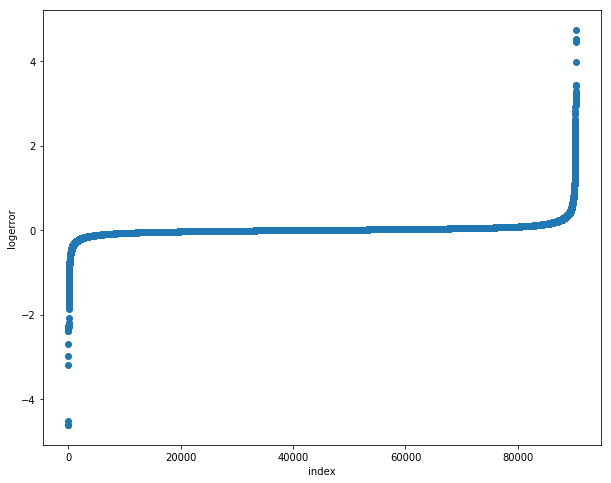

In [10]:
plt.figure(figsize=(10,8))
plt.scatter(range(train_df_16.shape[0]), np.sort(train_df_16.logerror.values))
plt.xlabel('index')
plt.ylabel('logerror')
plt.savefig('Logerror.png', dpi=100)
plt.show()


## Removing the Outliners

c:\program files\python36\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


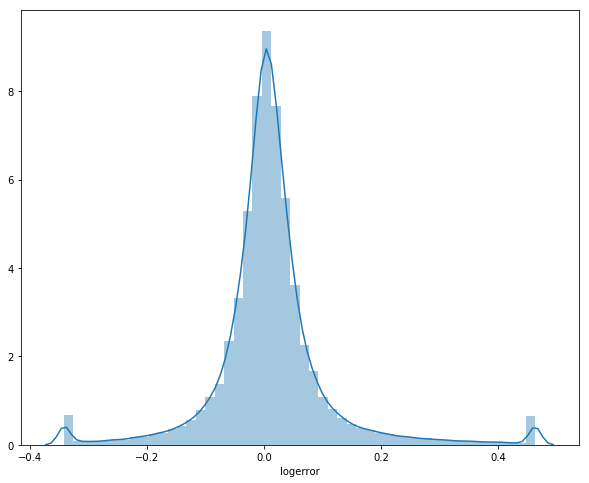

In [11]:
upper = np.percentile(train_df_16.logerror.values, 99)
lower = np.percentile(train_df_16.logerror.values, 1)
train_df_16['logerror'].loc[train_df_16['logerror']>upper] = upper
train_df_16['logerror'].loc[train_df_16['logerror']<lower] = lower

plt.figure(figsize=(10,8))
sns.distplot(train_df_16.logerror.values, bins=50)
plt.xlabel('logerror')
plt.show()

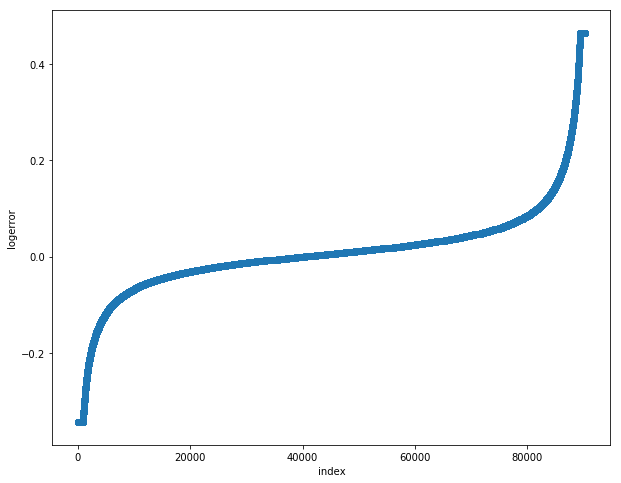

In [12]:
plt.figure(figsize=(10,8))
plt.scatter(range(train_df_16.shape[0]), np.sort(train_df_16.logerror.values))
plt.xlabel('index')
plt.ylabel('logerror')
plt.show()

## Basic Data Analysis


c:\program files\python36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


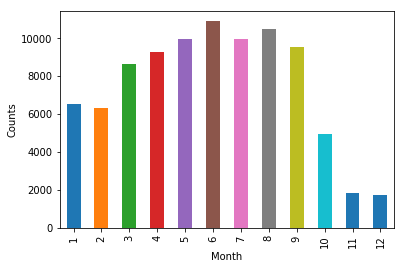

In [13]:
train_df_16.month = train_df_16.index.month
train_df_16.month.value_counts().sort_index().plot.bar()
plt.xlabel('Month')
plt.ylabel('Counts')
plt.savefig('Months.png')
plt.show()


In [14]:
train_df_16.logerror.describe()

count    90275.000000
mean         0.010404
std          0.100614
min         -0.342500
25%         -0.025300
50%          0.006000
75%          0.039200
max          0.463882
Name: logerror, dtype: float64

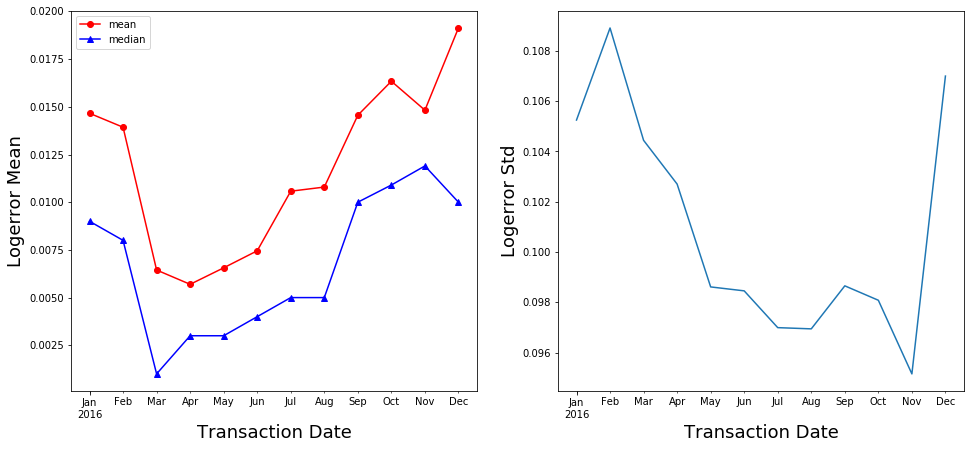

In [15]:
label_fs = 18
fig = plt.figure(figsize=(16, 7))
plt.subplot(1, 2, 1)
train_df_16.logerror.resample('M').mean().plot(marker='o', color='r', label='mean')
train_df_16.logerror.resample('M').median().plot(marker='^', color='b', label = 'median')
plt.legend()
plt.xlabel('Transaction Date', fontsize=label_fs)
plt.ylabel('Logerror Mean', fontsize=label_fs)
plt.subplot(1, 2, 2)
train_df_16.logerror.resample('M').std().plot()
plt.xlabel('Transaction Date', fontsize=label_fs)
plt.ylabel('Logerror Std', fontsize=label_fs)
plt.savefig('line-month.png')
plt.show()


Upper boundary (0.99): 0.463747
Lower boundary (0.01): -0.342500


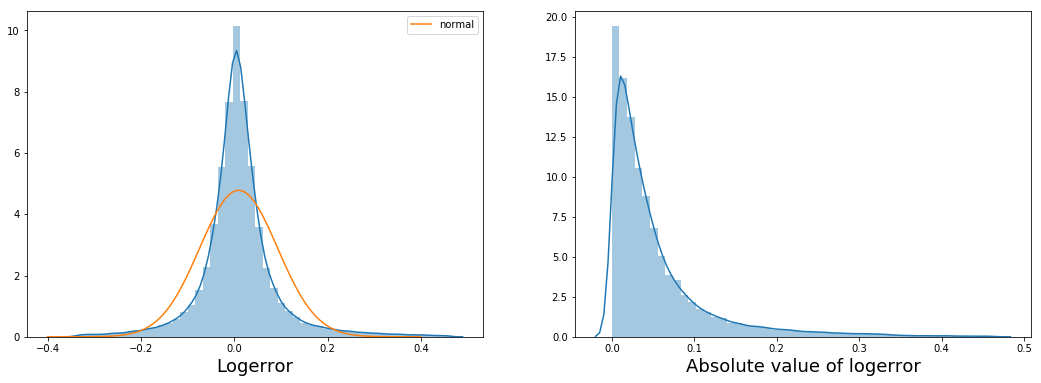

In [16]:
import matplotlib.mlab as mlab
ulimit = np.percentile(train_df_16.logerror.values, 99)
llimit = np.percentile(train_df_16.logerror.values, 1)
print('Upper boundary (0.99): %lf' % ulimit)
print('Lower boundary (0.01): %lf' % llimit)
truncated_df = train_df_16.loc[(train_df_16.logerror<ulimit) & (train_df_16.logerror>llimit), 'logerror']
# Plot distribution
fig = plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.distplot(truncated_df)
x = np.linspace(-0.4, 0.4, 100)
plt.plot(x, mlab.normpdf(x, truncated_df.mean(), truncated_df.std()), label='normal')
plt.legend()
plt.xlabel('Logerror', fontsize = label_fs)
plt.subplot(1, 2, 2)
sns.distplot(np.abs(truncated_df))
plt.xlabel('Absolute value of logerror', fontsize = label_fs)
plt.savefig('logerror-absoulte.png')
plt.show()


## The analysis of logerror:
According to the definition of logerror = log(Zestimate) - log(SalePrice), a positive value of logerror indicates Zestimate overestimate the data and a negative value indicates the opposite. The absolute value of the logerror implies the error size of Zestimate.

- The house market is warmer is summer season. The data in fourth quarter is kept for test purpose.
- On average, Zestimate model overestimates the sale price.
- Despite the large standard deviation of data, Zestimate model is more likely to overestimate the sale price in winter time.
- There exist extreme outliers, where the ratio of Zestimate / Sale price could be as large as 50 or as small as 0.02.
- After keeping the logerror between 1% and 99%, we see a heavy tailed distribution compared to normal distribution with the same mean and standard deviation.

In [17]:
train_df_16.reset_index(inplace=True)
df2016 = train_df_16.merge(prop_df_16, on='parcelid', how='left')
# del prop_df_16
# del train_df_16
display(df2016.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 60 columns):
transactiondate                 90275 non-null datetime64[ns]
parcelid                        90275 non-null int64
logerror                        90275 non-null float64
airconditioningtypeid           28781 non-null float64
architecturalstyletypeid        261 non-null float64
basementsqft                    43 non-null float64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
buildingclasstypeid             16 non-null float64
buildingqualitytypeid           57364 non-null float64
calculatedbathnbr               89093 non-null float64
decktypeid                      658 non-null float64
finishedfloor1squarefeet        6856 non-null float64
calculatedfinishedsquarefeet    89614 non-null float64
finishedsquarefeet12            85596 non-null float64
finishedsquarefeet13            33 non-null float64
finishedsquarefeet15

None

In [18]:
# Remove the outliers
new_df = df2016[(df2016.logerror<upper) & (df2016.logerror>lower)]
# del df2016

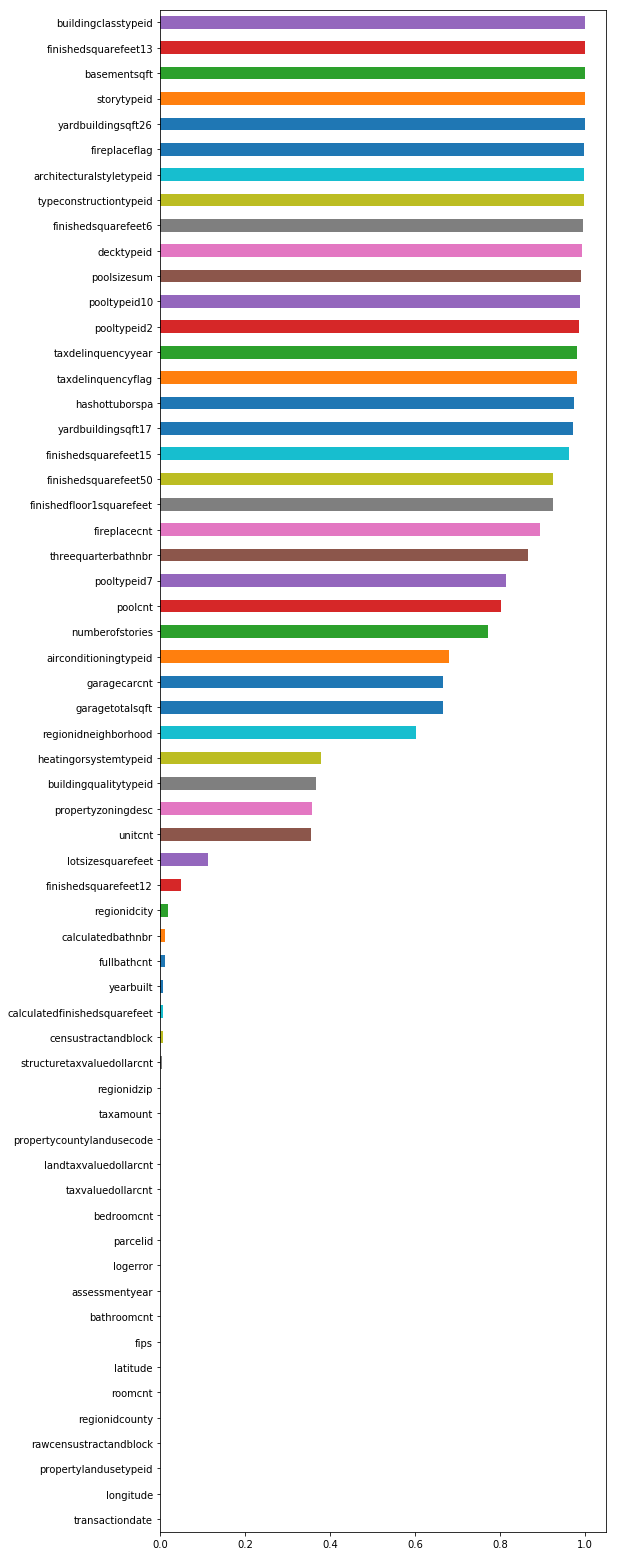

In [19]:
# Look at the missing values
nrow = new_df.shape[0]
nans = new_df.isnull().sum() / nrow
nans = nans.sort_values()
fig, ax = plt.subplots(figsize=(8,28))
rects = nans.plot.barh(ax= ax)
plt.show()

In [20]:
nans[nans>0.99]


decktypeid                  0.992686
finishedsquarefeet6         0.995591
typeconstructiontypeid      0.996643
architecturalstyletypeid    0.997072
fireplaceflag               0.997513
yardbuildingsqft26          0.998971
storytypeid                 0.999537
basementsqft                0.999537
finishedsquarefeet13        0.999661
buildingclasstypeid         0.999864
dtype: float64

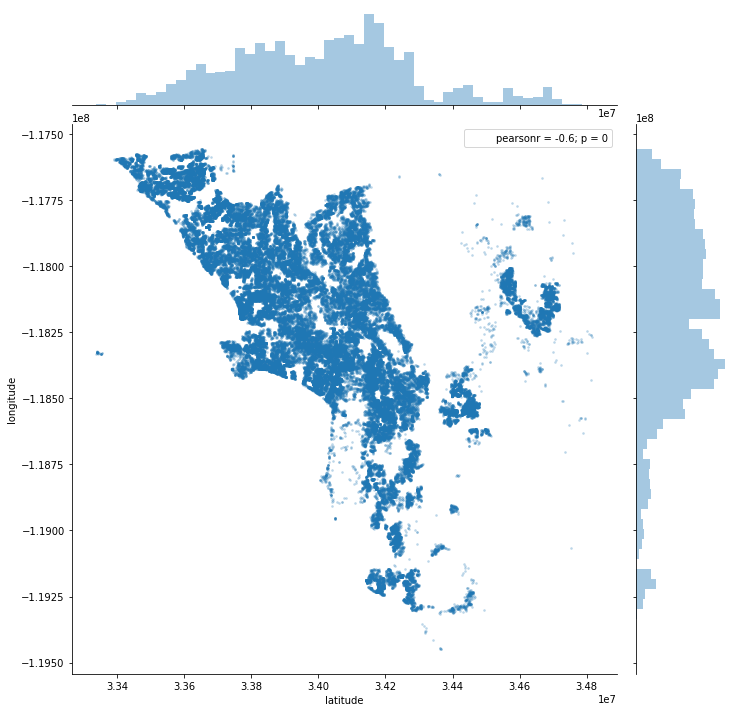

In [21]:
# Locational data
sns.jointplot(x='latitude', y='longitude', data=new_df, size=10, joint_kws={'s': 3, 'alpha':0.2})
plt.savefig('lat-long.png')
plt.show()


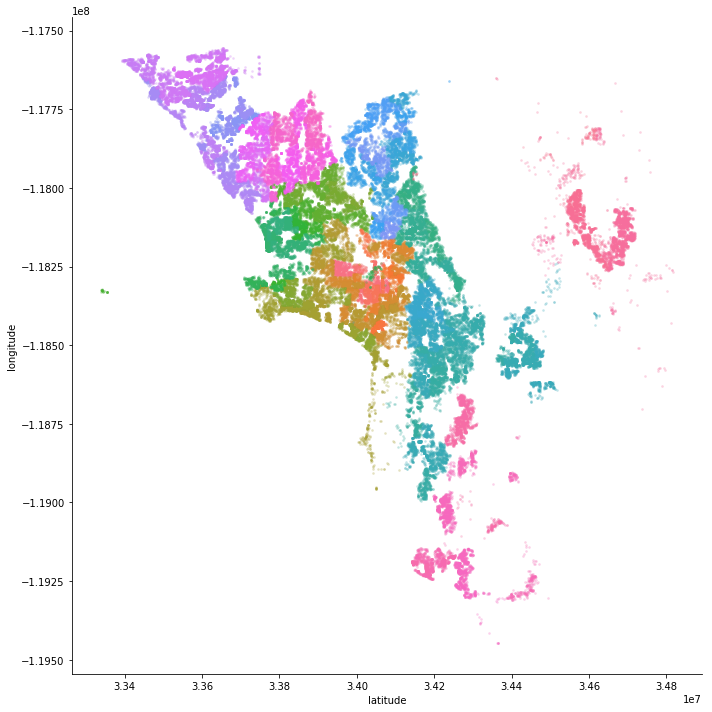

In [22]:
# The distribution of data among zipcodes
sns.lmplot(x='latitude', y='longitude', data=new_df, size=10, hue='regionidzip', 
           fit_reg=False, legend=False, scatter_kws={'s': 3, 'alpha':0.2})
plt.savefig('lat-long-pin.png')
plt.show()


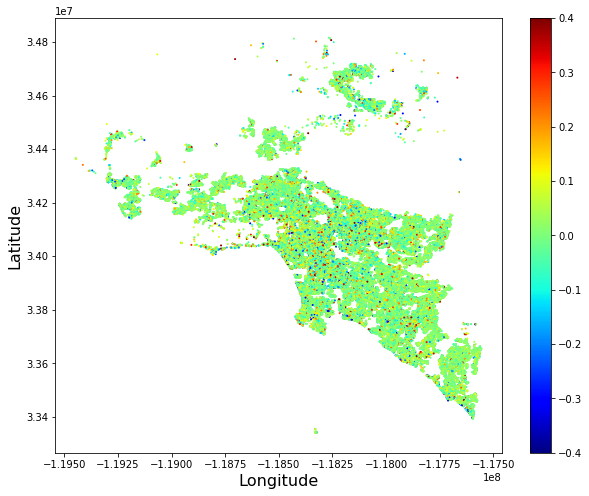

In [23]:
# The logerror on map
plt.figure(figsize=(10,8))
cm = plt.cm.get_cmap('jet')
sc = plt.scatter(new_df.longitude, new_df.latitude, c=new_df.logerror, vmin = -0.4, vmax = 0.4, s=1, cmap=cm)
plt.colorbar(sc)
plt.xlabel('Longitude', fontsize = 16)
plt.ylabel('Latitude', fontsize = 16)
plt.savefig('logerror-lat-long.png')
plt.show()


In [24]:
new_df.regionidzip.unique()

array([ 96370.,  96962.,  96293.,  96222.,  96961.,  96109.,  96091.,
        97101.,  96987.,  96963.,  96426.,  96120.,  96437.,  96947.,
        97035.,  96964.,  96393.,  96238.,  96990.,  96379.,  96239.,
        97001.,  97052.,  96026.,  97050.,  96190.,  97329.,  96349.,
        96374.,  96088.,  96242.,  96008.,  96361.,  96364.,  97007.,
        97078.,  96220.,  97004.,  96295.,  97067.,  96043.,  97048.,
        96387.,  96971.,  96013.,  96505.,  96506.,  96513.,  97008.,
        97041.,  96978.,  96097.,  96133.,  96324.,  96993.,  96474.,
        97026.,  96007.,  96952.,  97116.,  96447.,  96436.,  97005.,
        96384.,  96475.,  96383.,  96996.,  96986.,  96072.,  96107.,
        96965.,  97020.,  96247.,  97106.,  96995.,  97059.,  96169.,
        96028.,  96020.,  96969.,  96029.,  96351.,  96974.,  97083.,
        96183.,  96957.,  96420.,  96193.,  96058.,  97065.,  97039.,
        96337.,  96982.,  96507.,  97319.,  96159.,  96369.,  96240.,
        96268.,  970

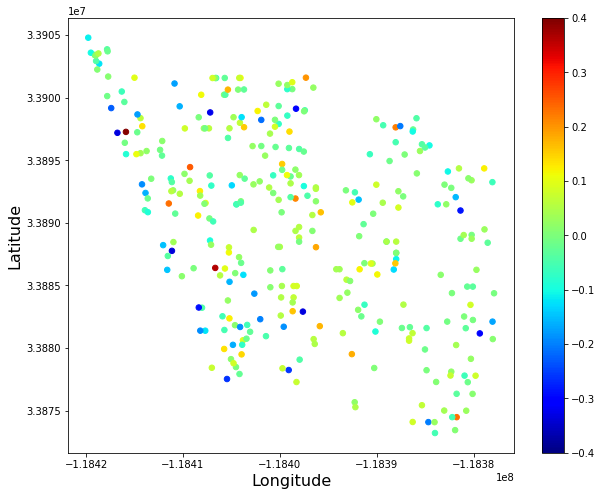

In [25]:
plt.figure(figsize=(10,8))
cm = plt.cm.get_cmap('jet')
zipid = 96117
sc = plt.scatter(new_df[new_df.regionidzip ==zipid].longitude, 
                 new_df[new_df.regionidzip ==zipid].latitude, 
                 c=new_df[new_df.regionidzip ==zipid].logerror, 
                 vmin = -0.4, vmax = 0.4, s=30, cmap=cm)
plt.colorbar(sc)
plt.xlabel('Longitude', fontsize = 16)
plt.ylabel('Latitude', fontsize = 16)
plt.show()

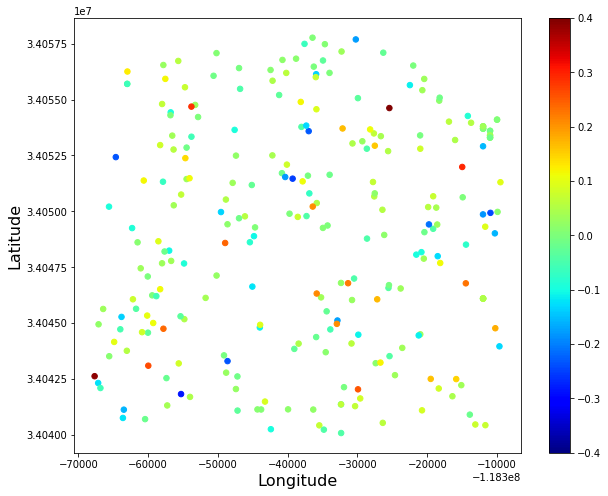

In [26]:
# Zoom in figure of logerror in the other zip code area
plt.figure(figsize=(10,8))
cm = plt.cm.get_cmap('jet')
zipid = 96000
sc = plt.scatter(new_df[new_df.regionidzip ==zipid].longitude, 
                 new_df[new_df.regionidzip ==zipid].latitude, 
                 c=new_df[new_df.regionidzip ==zipid].logerror, 
                 vmin = -0.4, vmax = 0.4, s=30, cmap=cm)
plt.colorbar(sc)
plt.xlabel('Longitude', fontsize = 16)
plt.ylabel('Latitude', fontsize = 16)
plt.show()


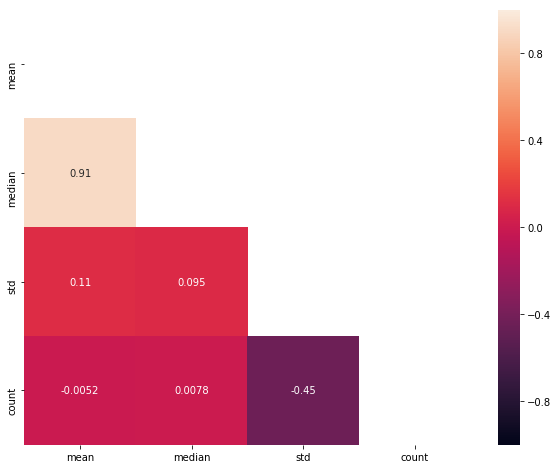

In [27]:
logerror_zip = new_df.groupby('regionidzip')['logerror'].agg(['mean', 'median', 'std', 'count'])
plt.figure(figsize=(10, 8))
mask = np.zeros((4,4))
mask[np.triu_indices_from(mask)] = True
sns.heatmap(logerror_zip.corr(), annot=True, mask = mask, vmin=-1, vmax=1)
plt.savefig('zipcode-heatmap.png')
plt.show()


The performance of Zestimate depends on locations. The logerror heatmap of LA region shows a lot of noise. Take zipcode for instance, the performance of Zestimate varies from one district to another. The correlation coefficient between house number and logerror standard in regions is -0.45, implying that the district with less houses have a more spead distribution of Logerror.

(-0.5, 515.5, 515.5, -0.5)

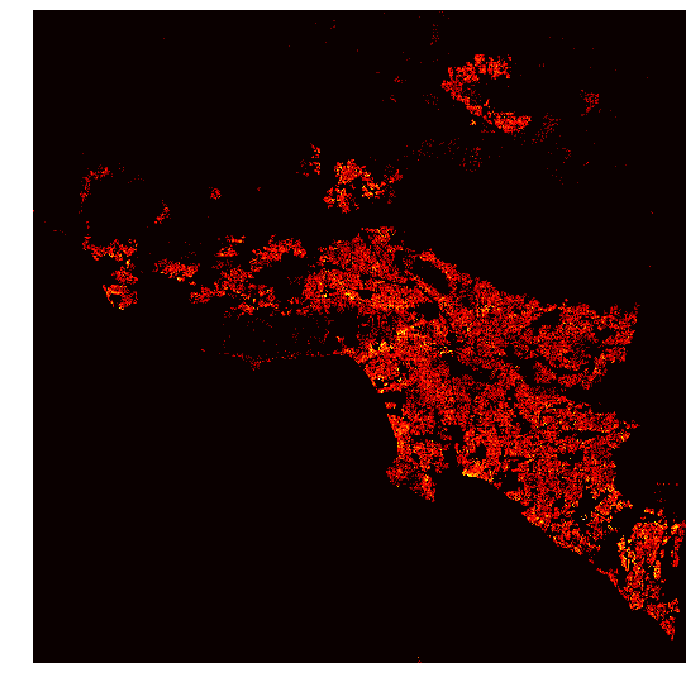

In [28]:
# Log(density) of houses

# Image size, location range for heatmap construction
im_size = (516, 516)
long_range = [-1.194479e+08, -1.175549e+08+1.194479e+08]
lat_range = [3.333930e+07, 3.481601e+07-3.333930e+07]
def get_coor(long, lat):
    # Get coordinate of point in heatmap from longitude and latitude.
    im_long = int((long - long_range[0]) / long_range[1] * im_size[0])
    im_lat = im_size[1]- int((lat - lat_range[0]) / lat_range[1] * im_size[1])
    return (im_long, im_lat)

location = new_df[['longitude', 'latitude']]
im_longitude =((location.longitude - long_range[0]) / long_range[1] * im_size[0]).astype(int)
im_latitude = im_size[1] - ((location.latitude - lat_range[0]) / lat_range[1] * im_size[1]).astype(int)
# Populate the regional trip density for heatmap
density = np.zeros(im_size)
for long, lat in zip(im_longitude, im_latitude):
    if long >= 0 and long < im_size[0] and lat >= 0 and lat < im_size[1]:
        density[lat, long] +=1
# Plot log trip density heatmap
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(np.log(density + 1), cmap='hot')
plt.axis('off')

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


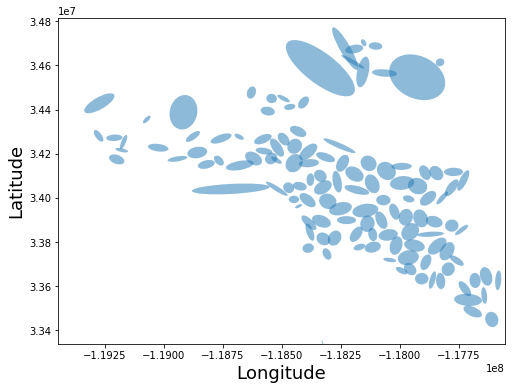

In [29]:
# Create new feature: cluster, to group houses.
from sklearn.mixture import GaussianMixture
# from sklearn.cluster import KMeans
from matplotlib.patches import Ellipse
from numpy import linalg
def create_cluster(df, n_cluster):
    """
    Create cluster by Guassian Mixture
    """
    gmm = GaussianMixture(n_components=n_cluster, covariance_type='full', random_state=1)
    # gmm = KMeans(n_clusters = n_cluster)
    gmm.fit(df[['longitude', 'latitude']])
    df['cluster'] = gmm.predict(df[['longitude', 'latitude']])
    means, covars = gmm.means_, gmm.covariances_
    fig, ax = plt.subplots(figsize=(8, 6))
    for mean, covar in zip(means, covars):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = Ellipse(mean, v[0], v[1], 180. + angle)
        # ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_patch(ell)
    urcornerlat = 3.481601e+07
    urcornerlong = -1.175549e+08
    llcornerlat = 3.333930e+07
    llcornerlong = -1.194479e+08
    plt.axis([llcornerlong, urcornerlong, llcornerlat, urcornerlat])
    plt.xlabel('Longitude', fontsize=18)
    plt.ylabel('Latitude', fontsize=18)
    plt.show()
        
create_cluster(new_df, 125)

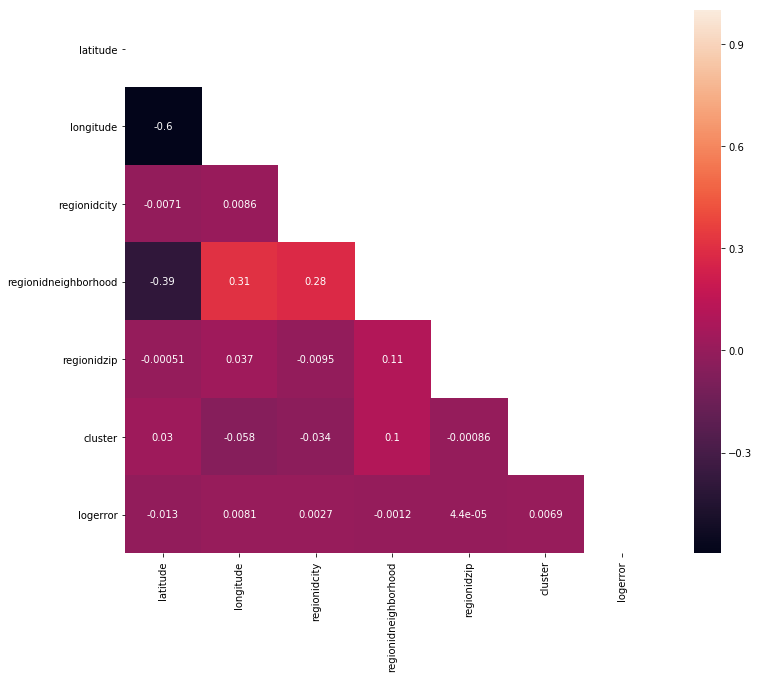

In [30]:
# Coefficient matrix of logerror and positional features.
pos = ['latitude', 'longitude', 'regionidcity', 'regionidneighborhood', 'regionidzip', 'cluster', 'logerror']
mask = np.zeros((7,7))
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,10))
sns.heatmap(new_df[pos].corr(), mask = mask, vmax = 1, annot=True)
plt.savefig('imp-features-heatmap.png')
plt.show()


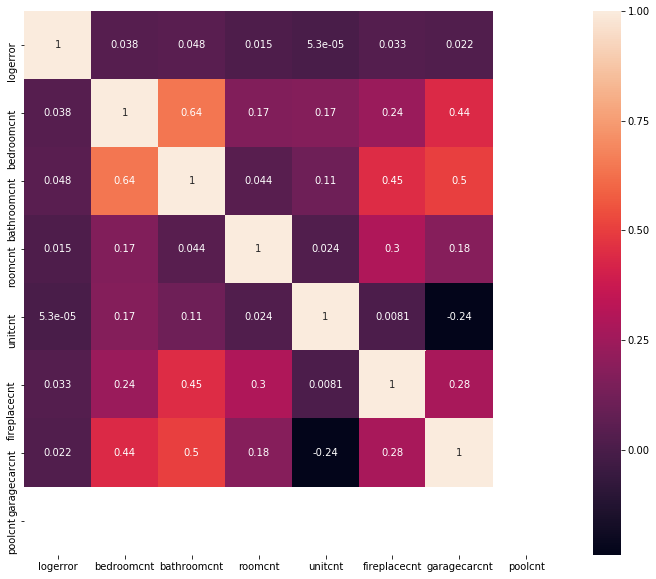

In [31]:
room = ['logerror', 'bedroomcnt', 'bathroomcnt', 'roomcnt', 'unitcnt', 'fireplacecnt', 'garagecarcnt', 'poolcnt']
plt.figure(figsize=(12,10))
sns.heatmap(new_df[room].corr(), annot=True)
plt.savefig('room-heatmap.png')
plt.show()


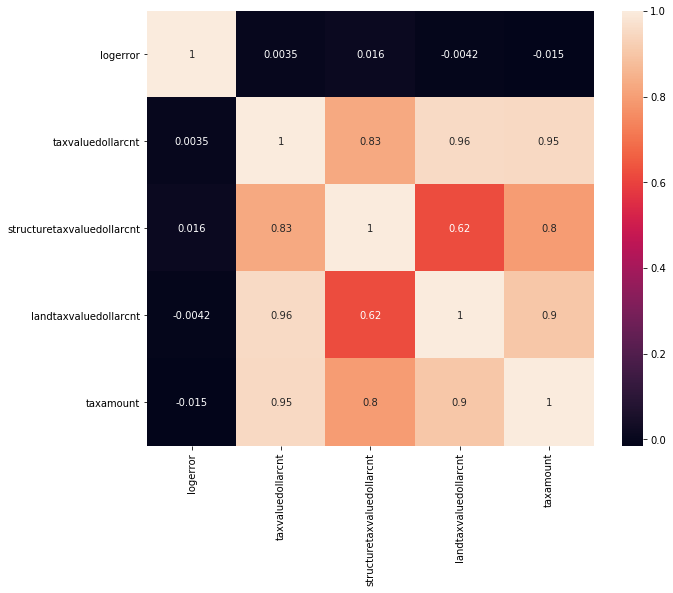

In [32]:
tax = ['logerror', 'taxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount']
plt.figure(figsize=(10,8))
sns.heatmap(df2016[tax].corr(), annot=True)
plt.savefig('tax-heatmap.png')
plt.show()


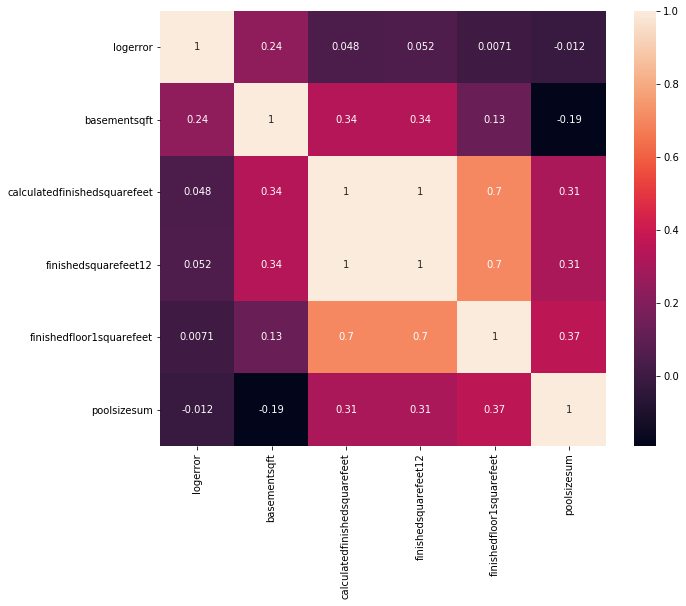

In [33]:
area = ['logerror', 'basementsqft', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'finishedfloor1squarefeet', 
        'poolsizesum']
plt.figure(figsize=(10,8))
sns.heatmap(df2016[area].corr(), annot=True)
plt.savefig('area-heatmap.png')
plt.show()


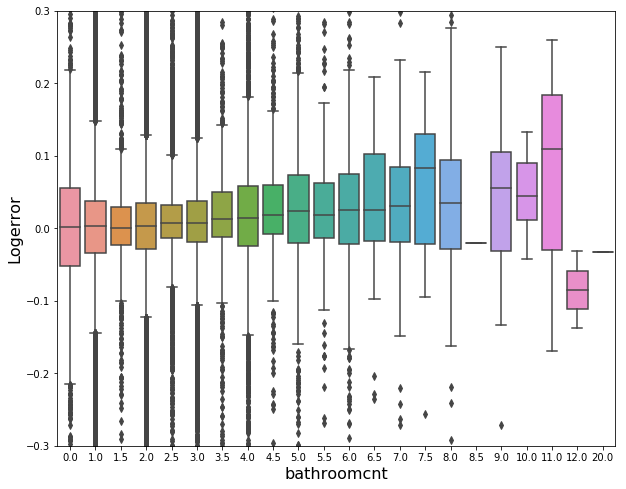

In [34]:
# The dependence of logerror on bathroom cnt.
plt.figure(figsize=(10,8))
sns.boxplot(x = 'bathroomcnt', y = 'logerror', data = new_df)
plt.xlabel('bathroomcnt', fontsize = 16)
plt.ylabel('Logerror', fontsize= 16)
plt.ylim([-0.3, 0.3])
plt.savefig('logerror-bathroom.png')
plt.show()
